Universidade Federal do Rio de Janeiro<br />
Instituto Alberto Luiz Coimbra de Pós-Graduação e Pesquisa<br />
Programa de Engenharia Elétrica<br />
Signals, Multimedia, and Telecommunications group<br />
(SMT / PEE / COPPE / UFRJ)

Author: Pedro Angelo Medeiros Fonini &lt;pedro.fonini@smt.ufrj.br&gt;<br />
Advisors:
* Paulo Sergio Ramirez Diniz
* Markus Vinícius Santos Lima

In [653765]:
%matplotlib inline 

import sys
import os
import pathlib

import numpy as np
from scipy import linalg
import matplotlib as mpl
dfs = 14 # default font size
mpl.rc('font', family='serif', size=dfs)
mpl.rc('text', usetex=True)
import matplotlib.pyplot as plt

sys.path.append(os.fspath(pathlib.Path().resolve().parent / 'src'))
import graphdsp as gsp

In [2]:
default_edge_grayscale = False

In [3]:
%%time
graph = gsp.GeometricUWG.make_random_pretty()

CPU times: user 516 ms, sys: 27.4 ms, total: 543 ms
Wall time: 527 ms


<Figure size 432x288 with 0 Axes>

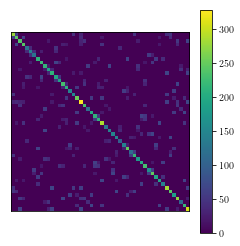

<Figure size 432x288 with 0 Axes>

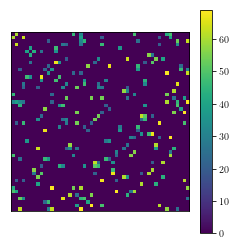

In [4]:
graph.visualize_laplacian()
graph.visualize_adjacency()

In [5]:
def gplot(x, *,
          cmap=mpl.cm.get_cmap('viridis'), title=None, 
          colorbar=True, edge_grayscale=default_edge_grayscale,
          show_indexes=False, filename=None, dpi=300):
    # TODO: faz uma opção edge_color pra substituir o edge_grayscale
    # edge_color='grayscale'  =>  fica como se especificasse o grayscale
    # edge_color='zero-crossing'  =>  colore de vermelho os zero-crossings,
    #     e o resto deixa preto mesmo.
    # edge_color=<qq outra coisa>  =>  passa color=edge_color pro plot
    # default: edge_color='k'
    points = x.graph.nodes
    W = x.graph.W
    N = len(x)
    fig, ax = plt.subplots()
    for i in range(N):
        for j in range(i+1,N):
            if W[i,j] > 0:
                if edge_grayscale:
                    edge_color = "{}".format(1-W[i,j]/W.max())
                else:
                    edge_color = "k"
                ax.plot(points[[i,j],0], points[[i,j],1], 
                        color=edge_color, zorder=1)
    #r = x.max() - x.min()
    #if r == 0:
    #    r = 1
    #u = (x - x.min()) / r
    scatter = ax.scatter(points[:,0], points[:,1], 
                         s=100, lw=1, edgecolor='k', c=x.values, 
                         cmap=cmap, zorder=2)
    if show_indexes:
        for i in range(N):
            ax.text(points[i,0]+.015, points[i,1]+.015, '{}'.format(i))
    if colorbar:
        cbar = fig.colorbar(scatter)
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title, fontsize=dfs)
    if filename:
        fig.savefig(filename, dpi=dpi)

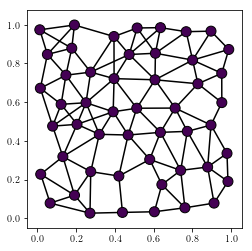

In [6]:
gplot(gsp.GraphSignal([0]*len(graph), graph=graph), colorbar=False)

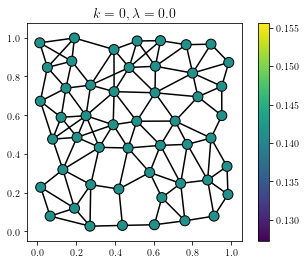

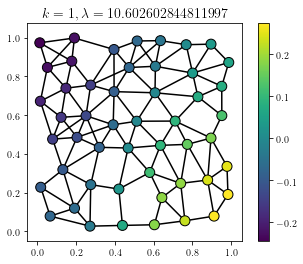

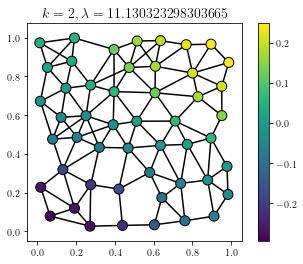

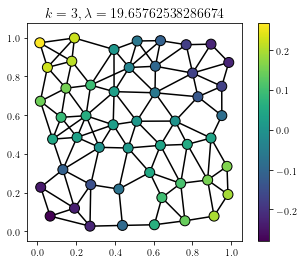

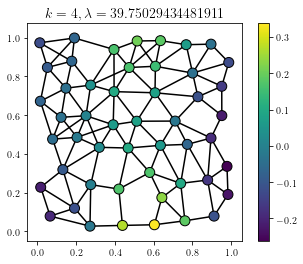

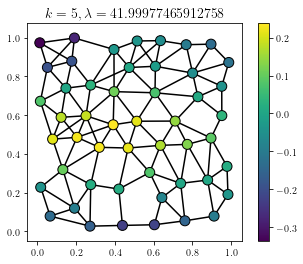

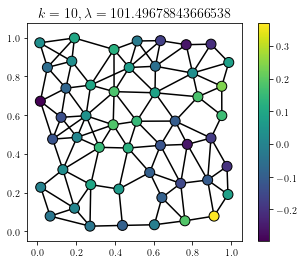

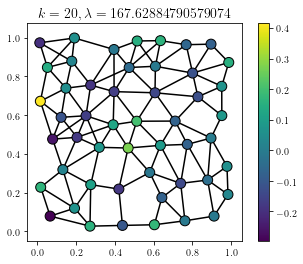

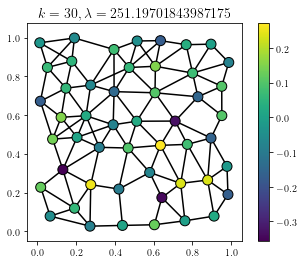

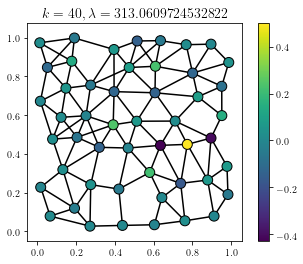

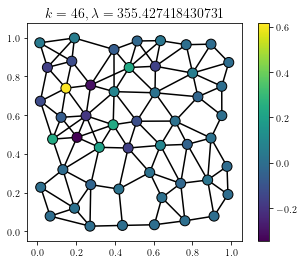

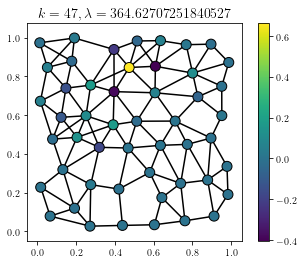

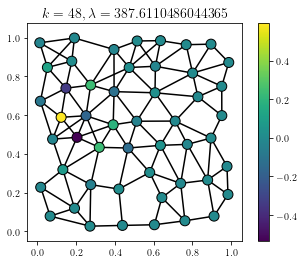

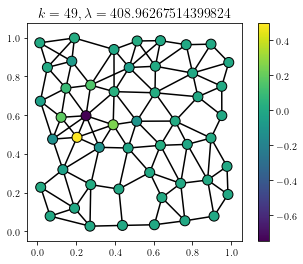

In [7]:
lambd, U = graph.spectral_decomposition()
maxval = np.abs(U).max()
# TODO: usar esse maxval para uniformizar os colorbars
for k in [0,1,2,3,4,5,10,20,30,40,46,47,48,49]:
    if k >= len(graph):
        break
    gplot(gsp.GraphSignal(U[:,k], graph), 
          title='$k={}, \\lambda={}$'.format(k, lambd[k]),
          filename=f'graph-ev-{k:02}.png')

In [8]:
%%time

def maxdet(UF):
    N = len(UF)
    S = []
    ldets = []
    D = np.zeros((N,N))
    for i in range(N):
        maxldet = -float('inf')
        argmax = None
        bestD = D.copy()
        for j in range(N):
            if j in S:
                continue
            Dc = D.copy() # candidate to new D
            Dc[j,j] = 1
            evs, _ = np.linalg.eigh(UF.T @ Dc @ UF)
            evs = np.sort(evs)
            logdet = np.sum(np.log(evs[-i-1:]))
            if logdet > maxldet:
                argmax = j
                maxldet = logdet
                bestD = Dc
        S.append(argmax)
        ldets.append(maxldet)
        D = bestD
    return S, ldets

N = len(graph)
M = N//5
F = list(range(M))

UF = U[:,F]
S, ldets = maxdet(UF)

CPU times: user 761 ms, sys: 1.21 s, total: 1.97 s
Wall time: 1.34 s


In [9]:
ldets

[-0.6379567570920666,
 -1.6578190250124594,
 -2.759281771489839,
 -3.8771912053150475,
 -5.02084503004257,
 -6.18256467427815,
 -7.475924402014887,
 -9.02941735008561,
 -10.83079788347446,
 -12.883694859609893,
 -11.85684877548404,
 -11.07225398425121,
 -10.376564775599139,
 -9.692781443060136,
 -9.012193344492578,
 -8.40337815638169,
 -7.800444607922667,
 -7.277177514596157,
 -6.766466794759582,
 -6.341381325328899,
 -5.931955711694095,
 -5.524973040466552,
 -5.147186025890126,
 -4.796945282732469,
 -4.457087817482662,
 -4.131670088522899,
 -3.813038590084891,
 -3.53978736440606,
 -3.289046905250591,
 -3.040157904987988,
 -2.8041626251175837,
 -2.5740396310143727,
 -2.3485695205224553,
 -2.1531745990187616,
 -1.964691064535826,
 -1.7801506413886505,
 -1.5964958738205097,
 -1.4265006599736798,
 -1.2628413857158813,
 -1.1105558318181534,
 -0.9600895045345196,
 -0.8200624358149422,
 -0.6844141929683656,
 -0.5607225102700059,
 -0.43869106151910375,
 -0.32816840858351165,
 -0.2196061431592

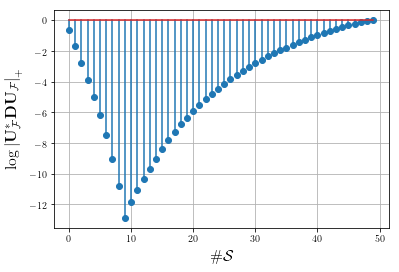

In [10]:
plt.stem(ldets)
plt.grid()
plt.xlabel(r"$\#\mathcal S$", fontsize=dfs+2)
plt.ylabel(r'$\log \left|\mathbf U_{\mathcal F}^*\mathbf D\mathbf U_{\mathcal F}\right|_+$',
           fontsize=dfs+2)
plt.savefig('logdet.png', dpi=300)

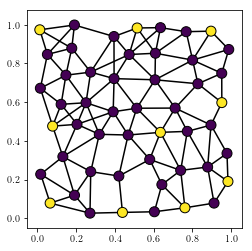

In [11]:
S_mask = np.zeros(N, dtype=bool)
S_mask[S[:M]] = True
gplot(gsp.GraphSignal(S_mask.astype(float), graph=graph), colorbar=False, filename='maxdet.png')

In [12]:
F_mask = np.zeros(N, dtype=bool)
F_mask[F] = True

def random_F(*, band=F_mask, graph=graph, 
             random_source=np.random.standard_normal):
    """Generates a random bandlimited graph signal.
    
    band: a vector of booleans specifying the band
    U: a unitary matrix whose columns are eigensignals of the graph
    random_source: a function that receives an integer N and returns N random
        real numbers.
    """
    f = gsp.GraphSignalSpectrum(random_source(len(U)) * band, graph=graph, mutable=False)
    return f.igft

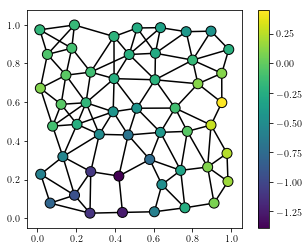

In [13]:
x0 = random_F()
gplot(x0, filename='lowpass.png')

In [14]:
T = 100

In [15]:
def maxmu(UF, S):
    N = len(UF)
    D = np.zeros((N,N))
    D[S,S] = 1
    return 2 / np.linalg.norm(UF.T @ D @ UF, ord=2)

In [16]:
%%time

mu = 0.5
x_hat = []

S_size_list = [7, 8, 9, 10, 20, 30, 50]
grad_norms = []

v_stdev = np.sqrt(0.01 * np.random.random_sample(N))
for S_size in S_size_list:
    D = np.zeros((N,N))
    D[S[:S_size],S[:S_size]] = 1
    Bf = np.zeros((N,N))
    Bf[F,F] = 1
    B = U @ Bf @ U.T
    mBD = mu * B @ D
    x_hat.append([random_F()])
    grad_norms.append([])
    for t in range(1,T):
        v = v_stdev * np.random.random_sample(N)
        mgrad = mBD @ (x0._values + v - x_hat[-1][-1]._values)
        x_hat[-1].append(
            gsp.GraphSignal(x_hat[-1][-1]._values + mgrad, graph=graph))
        grad_norms[-1].append(np.linalg.norm(mgrad)/mu)

CPU times: user 47.1 ms, sys: 0 ns, total: 47.1 ms
Wall time: 47.9 ms


In [17]:
def get_theoretical_msd(graph, F, S, Cv):
    N = len(graph)
    lambd, U = graph.spectral_decomposition()
    UF = U[:,F]
    D = np.zeros((N,N))
    D[S,S] = 1
    G = UF.T @ D @ Cv @ D @ UF
    ImUDU = np.eye(UF.shape[1]) - mu * UF.T @ D @ UF
    Q = np.kron(ImUDU, ImUDU)
    sA = np.eye(len(Q)) - Q
    sB = np.eye(UF.shape[1]).flatten('F')
    print(sA.shape, sB.shape)
    msd = mu*mu * G.flatten('F').dot(np.linalg.solve(sA, sB))
    return msd

(100, 100) (100,)


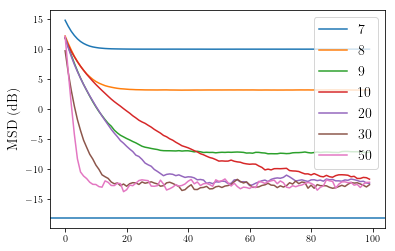

In [18]:
msd = []
for i in range(len(S_size_list)):
    msd.append([])
    for t in range(T):
        msd[-1].append((x_hat[i][t] - x0).norm())
plt.plot(20*np.log10(np.asarray(msd).T))
plt.legend([str(Ssz) for Ssz in S_size_list], fontsize=dfs)
plt.ylabel('MSD (dB)', fontsize=dfs)
plt.axhline(10*np.log10(get_theoretical_msd(graph, F, S[:10], np.diag(v_stdev**2))))
plt.savefig('lms-transient.png', dpi=300)

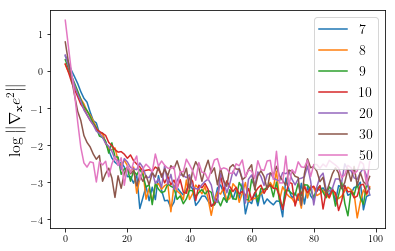

In [19]:
plt.plot(np.log(np.array(grad_norms).T))
plt.legend([str(Ssz) for Ssz in S_size_list], fontsize=dfs)
plt.ylabel(r'$\log\left\|\nabla_{\mathbf x} e^2\right\|$', fontsize=dfs+2)
plt.savefig('gradnorm.png', dpi=300)

In [20]:
i, j = graph.W.argmax() // len(graph), graph.W.argmax() % len(graph)
graph.W.max(), graph.W[i,j]

(68.89372522120209, 68.89372522120209)

In [21]:
W2 = graph.W
W2[i,j] = 0
W2[j,i] = 0
graph2 = gsp.UndirectedWeightedGraph(W=W2)

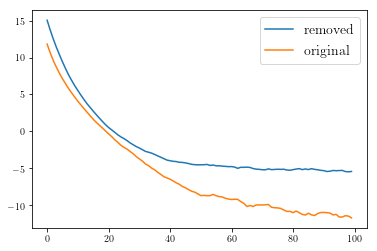

In [22]:
lambd, U = graph2.spectral_decomposition()
UF = U[:,F]
S_size = 10
D = np.zeros((N,N))
D[S[:S_size],S[:S_size]] = 1
Bf = np.zeros((N,N))
Bf[F,F] = 1
B = U @ Bf @ U.T
mBD = mu * B @ D
x_hat = [random_F(graph=graph2)]
for t in range(1,T):
    v = v_stdev * np.random.random_sample(N)
    x_hat.append(
        gsp.GraphSignal(x_hat[-1]._values 
                        + mBD @ (x0._values + v - x_hat[-1]._values), graph=graph))

msd2 = []
for t in range(T):
    msd2.append((x_hat[t] - x0.values).norm())
plt.plot(20*np.log10(np.asarray(msd2).T))
plt.plot(20*np.log10(np.asarray(msd[3]).T))
plt.legend(['removed', 'original'], fontsize=dfs)